In [4]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

### Import Libraries

- **PyTorch (`torch`)**: Core deep learning library for building and training neural networks.  
- **`torch.nn`**: Provides neural network layers, loss functions, and activation functions.  
- **`torch.optim`**: Contains optimization algorithms like Adam, SGD, etc.  
- **`torchvision`**: Provides popular datasets (like MNIST, CIFAR-10), pre-trained models, and image transformations.  
- **`torchvision.transforms`**: Utilities for preprocessing and augmenting images (e.g., normalization, resizing).  
- **`matplotlib.pyplot`**: For data visualization and plotting images.  
- **NumPy (`np`)**: For numerical computations and handling arrays.  


In [5]:
# Load dataset (MNIST) with normalization
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

### Load Dataset (MNIST) with Normalization  

- **MNIST dataset**: A classic dataset of 70,000 handwritten digits (28x28 grayscale images).  
  - 60,000 training images  
  - 10,000 test images  

- **Transformations**:  
  - `transforms.ToTensor()` → Converts images into PyTorch tensors (values scaled between 0 and 1).  
  - `transforms.Normalize((0.5,), (0.5,))` → Normalizes pixel values to the range [-1, 1] for better training performance.  

- **`train_dataset` / `test_dataset`**:  
  - Downloads and prepares MNIST dataset.  
  - Applies the defined transformations (convert to tensor + normalize).  

- **DataLoader**:  
  - `train_loader`: Provides mini-batches of size 64, shuffling data each epoch.  
  - `test_loader`: Provides mini-batches of size 64 without shuffling (for consistent evaluation).  


In [6]:
# Check dataset size
print("Training set size:", len(train_dataset))
print("Test set size:", len(test_dataset))


Training set size: 60000
Test set size: 10000


### Check Dataset Size  

- `len(train_dataset)` → Returns the number of training samples (expected: **60,000**).  
- `len(test_dataset)` → Returns the number of test samples (expected: **10,000**).  

This confirms the dataset has been loaded correctly and split into training and testing sets.  


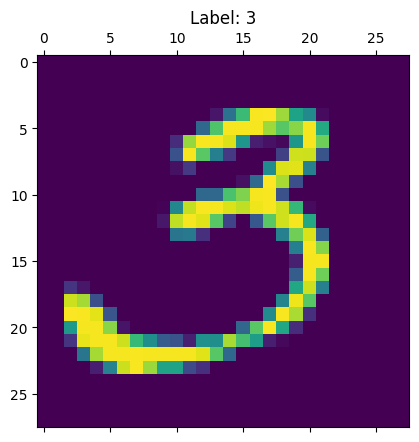

In [4]:
# Display the first training image
images, labels = next(iter(train_loader))
plt.matshow(images[0][0])
plt.title(f"Label: {labels[0].item()}")
plt.show()


### Display the First Training Image  

- `next(iter(train_loader))` → Retrieves one batch of images and labels from the training set.  
  - `images` → A batch of 64 images (shape: `[64, 1, 28, 28]`).  
  - `labels` → Corresponding digit labels for the batch.  

- `images[0][0]` → Selects the first image in the batch and removes the channel dimension to display it as a 28×28 matrix.  

- `plt.matshow(...)` → Plots the image in grayscale (the handwritten digit).  
- `plt.title(...)` → Displays the true label of the image as the plot title.  


In [8]:
# Define Neural Network model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x  # logits

model = NeuralNet()


### Define Neural Network Model  

- **Flatten**: Converts each 28×28 image into a 784-element vector.  
- **Linear(784 → 100) + ReLU**: Fully connected hidden layer with 100 units and ReLU activation.  
- **Linear(100 → 10)**: Output layer with 10 logits (one per digit class).  
- **Forward pass**: Defines how data flows through layers.  


In [9]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()   # CrossEntropy = Softmax + NLLLoss
optimizer = optim.Adam(model.parameters(), lr=0.001)


### Loss Function and Optimizer  

- **CrossEntropyLoss**: Combines Softmax + Negative Log-Likelihood, suitable for multi-class classification.  
- **Adam Optimizer**: Adaptive learning rate optimizer, updates model weights efficiently.  


In [10]:
# Train the model
epochs = 5
for epoch in range(epochs):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [1/5], Loss: 0.3229
Epoch [2/5], Loss: 0.0919
Epoch [3/5], Loss: 0.2641
Epoch [4/5], Loss: 0.0575
Epoch [5/5], Loss: 0.1247


### Train the Model  

- Run for **5 epochs** (full passes through the training set).  
- Each step:  
  1. Forward pass → compute predictions.  
  2. Compute loss with `CrossEntropyLoss`.  
  3. Backward pass → calculate gradients.  
  4. Optimizer step → update weights.  
- Prints loss at the end of each epoch.  


In [11]:
# Evaluate on test set
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 96.83%


### Evaluate on Test Set  

- Disable gradients with `torch.no_grad()` (faster, saves memory).  
- Get predictions using `torch.max` (highest logit = predicted class).  
- Compare predictions with true labels to count correct cases.  
- Compute and print overall **accuracy (%)** on test data.  


In [12]:
# Predictions on test set
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())


### Predictions on Test Set  

- Loop through the test set without gradients.  
- For each batch:  
  - Get predicted class (`torch.max`).  
  - Store predictions and true labels in lists.  
- These will be used to build a confusion matrix and analyze performance.  


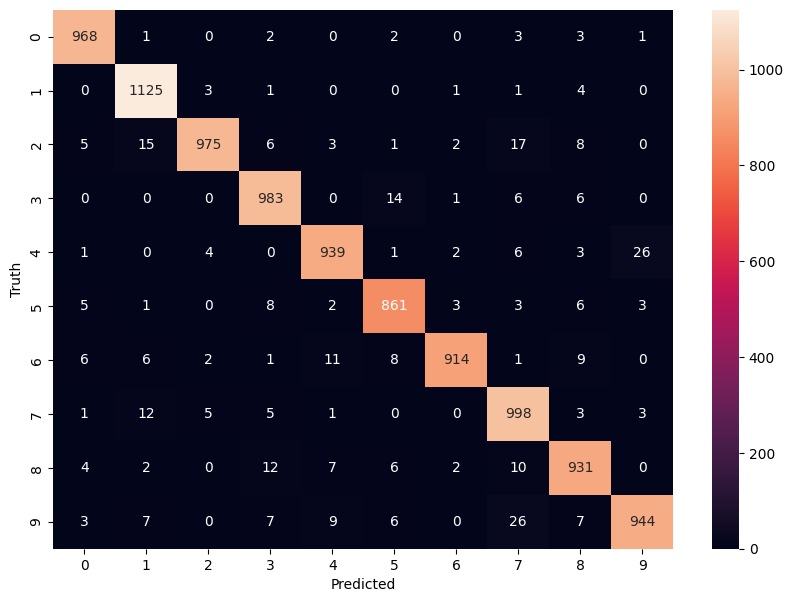

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


### Confusion Matrix  

- `confusion_matrix` (from `scikit-learn`) compares true vs. predicted labels.  
- Diagonal values = correct predictions.  
- Off-diagonal values = misclassifications.  
- `seaborn.heatmap` visualizes the matrix for easier interpretation.  


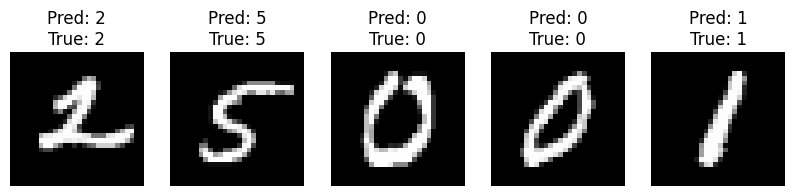

In [ ]:
# Show random predictions
import random

num_examples = 5
random_indices = random.sample(range(len(test_dataset)), num_examples)

plt.figure(figsize=(10, 2))
for i, idx in enumerate(random_indices):
    img, true_label = test_dataset[idx]
    img_reshaped = img.squeeze()

    with torch.no_grad():
        output = model(img.unsqueeze(0))
        pred_label = output.argmax(1).item()

    plt.subplot(1, num_examples, i+1)
    plt.imshow(img_reshaped, cmap='gray')
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')
plt.show()


### Show Random Predictions  

- Select 5 random images from the test set.  
- For each image:  
  - Run the model to get the predicted label.  
  - Display the image with predicted vs. true label.  
- Helps visualize model performance on unseen samples.  